# Introduction

Implemeting data structures from Skienna

## Sorting


#### Selection sort   $O(n^2)$

In [5]:
def selectionSort(L):
    
    for i in range(len(L)):
        
        #Find index of minimum in unsorted array (0 onwards)
        index_min = i
        for j in range(i+1,len(L)):
            if L[j] < L[index_min]:
                index_min = j
                
        #Swap
        L[i], L[index_min] = L[index_min], L[i]
        
L = [10,5,1,7,3,11]
selectionSort(L)

#### Insertion sort    $O(n^2)$

In [10]:
def insertionSort(L):
    
    for i in range(1,len(L)):
        
        #Insert L[i] into array (0, ..., i-1)
        key = L[i]
        j = i-1
        for j in range(i-1,-1,-1):
            if L[j] > L[j+1]:
                L[j], L[j+1] = L[j+1], L[j]
            else:
                break
        
L = [10,5,1,7,3,11]
insertionSort(L)
L

[1, 3, 5, 7, 10, 11]

#### Heapsort

Like selection sort, but uses a heap --> find minimum in log(n) time

See https://www.geeksforgeeks.org/heap-sort/

Complexity: O(n log n)

You can build your heap in O(n). Then you pop elements off, one at a time, each taking O(log n) time.

In [15]:
def heapify(L,n,i):
    """
    Heapify a list L of length n with node at root i
    """
  
    #Find largest among root, left child and right child
    largest = i
    l = 2*i + 1
    r = 2*i + 2
    
    #Check left and make sure it exists
    if l < n and L[l] > L[largest]:
        largest = l
    
    #Check right
    if r < n and L[r] > L[largest]:
        largest = r
        
    #Check if there's a swap needed 
    if largest != i:
        L[largest], L[i] = L[i], L[largest]  #do the swap
        heapify(L,n,largest)                 #recurse -- after swapping, you might have disturbed the tree
        
        
def heapSort(L):
    
    #make a heap: start at bottom and heapify
    n = len(L)
    for i in range(n-1,-1,-1):
        heapify(L,n,i)
    
    #do selection sort
    for i in range(n-1,0,-1):
        
        #swap max and 'last' -- last being at index i
        L[i], L[0] = L[0], L[i]
        
        #heapify everything on [0,i-1], which the swap made not a heap 
        heapify(L,i,0)
        
L = [5,3,8,1,2]
heapSort(L)

#### Merge sort

Time: O(n log n)
Space: O(N)

Good for sorting linked lists

In [5]:
def merge(x1,x2):
    """
    Problem with this method: python does things under the hood when I'm pop(0).
    Also, the append has to free up space
    """
    
    out = []
    
    #Peel off until one is empty
    while x1 and x2:
        if x1[0] < x2[0]:
            out.append(x1.pop(0))
        else:
            out.append(x2.pop(0))
    
    #Then attach the non-empty one
    if x1:
        out += x1
    if x2:
        out += x2
        
    return out



def merge(x1,x2):
    """
    This case is easy
    """
    
    merged = [0 for i in range(len(x1)+len(x2))]
    
    i = 0 #position in x1
    j = 0 #position in x2
    k = 0 #position in mergemd
    
    #Scan x1 and x2 until you get to end of one of them
    while i < len(x1) and j < len(x2):
        if x1[i] <= x2[j]:
            merged[k] = x1[i]
            i += 1
            k += 1
        else:
            merged[k] = x2[j]
            j += 1
            k += 1
            
    print('i, j = {}, {}'.format(i,j))
    
    #Then scan non empty one
    if i < len(x1):
        merged[k] = x1[i]
        i += 1
        k += 1
        
    if j < len(x2):
        merged[k] = x2[j]
        j += 1
        k += 1
        
    return merged


def mergeSort(x):
    if len(x) == 1:
        return x
    else:
        mid = len(x) // 2
        L, R = x[:mid], x[mid:]
        return merge(mergeSort(L), mergeSort(R))

x = [5,1,11,9,3]
x = mergeSort(x)
x

[1, 3, 5, 9, 11]

For linked lists, (tested in the data-structures files)

In [64]:
def mergeLists(l1,l2):
    
    #Edge cases
    if not l1:
        return l2
    if not l2:
        return l1
    
    #Get head of sorted list
    if l1.val < l2.val:
        head_sorted = l1
        l1 = l1.next
    else:
        head_sorted = l2
        l2 = l2.next
        
    #Main while loop
    temp = head_sorted
    while l1 and l2:
        if l1.val < l2.val:
            temp.next = l1
            l1 = l1.next
            temp = temp.next
        else:
            temp.next = l2
            l2 = l2.next
            temp = temp.next
            
    #Catch bits at end
    temp.next = l1 or l2  #i.e attach the non empty one
    
    return head_sorted


def mergeSort(head):
    
    #Edge case
    if head is None or head.next is None:
        return head
    
    #Find midpoint
    slow,fast = head, head.next
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
        
    #Now split the second half
    head2 = slow.next
    slow.next = None
    
    #Now merge these two lists
    sortedL = mergeSort(head)
    sortedR = mergeSort(head2)
    return mergeLists(sortedL, sortedR)

#### Quicksort

Complexity: O(n^2) worst case, but faster in practice --> O(n log n)

In [58]:
def partition(x,l,h):
    """
    Does two things:
    
    1. Finds the index of the pivot, p, in the SORTED array
    2. Partitions x such that everything to left of p is smaller than p (but not necessarily sorted)
       and everything to the right of p is larger than p. The benefit of this is that now you can 
       use divide and conquer.
    """
    
    index_pivot = h  #index of pivot
    x_pivot = x[index_pivot]
    
    low = l-1  #index of last element in left partiton
    for i in range(l,h):
        if x[i] < x_pivot:
            low += 1
            x[i], x[low] = x[low], x[i]
            
    #swap pivot
    x[index_pivot], x[low+1] = x[low+1], x[index_pivot]
    return low + 1  #position of pivot


def quickSort(x,l,h):
    
    if l <= h:
        p = partition(x,l,h)
        quickSort(x,l,p-1)
        quickSort(x,p+1,h)
    
x = [7,9,1,11,3,6]
l, h = 0, len(x)-1
quickSort(x,0,h)
x

[1, 3, 6, 7, 9, 11]

## Graphs

#### BFS

[1]
[2, 3, 6]
[3, 6]
[6, 4, 5, 6]
[4, 5, 6]
[5, 6]


True

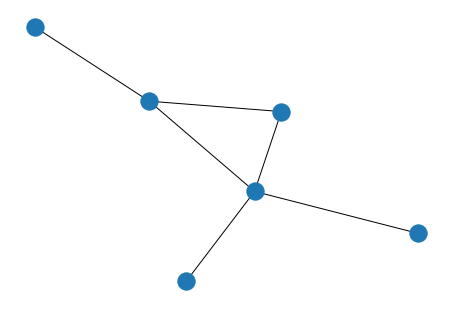

In [36]:
import numpy as np
import networkx as nx

def BFS(G,start,end):
    
    queue = [start]
    visited = set([])
    while queue:
        print(queue)
        node = queue.pop(0)   #take from top
        if node == end:
            return True
        if node not in visited: 
            visited.add(node)
            new_neighbours = set(dict(G[node]).keys()) - visited
            for n in new_neighbours:
                queue.append(n)
    return False

G = nx.Graph()
edges = [(1,2),(1,3),(3,4),(3,5),(3,6),(1,6)]
G.add_edges_from(edges)
nx.draw(G)

BFS(G,1,5)

In [44]:
def shortestPathBFS(G,start,end):
    
    queue = [(start,[start])]  #[ (node,[node1,node2,...]) ]
    visited = set([])
    while queue:
        (node,path) = queue.pop(0)   #take from top
        if node == end:
            return path
        if node not in visited: 
            visited.add(node)
            new_neighbours = set(dict(G[node]).keys()) - visited
            for n in new_neighbours:
                queue.append((n,path+[n]))
    return False

#Make graph
G = nx.Graph()
edges = [(1,2),(1,3),(3,4),(3,5),(3,6),(1,6)]
G.add_edges_from(edges)

path = shortestPathBFS(G,1,5)
path

[1, 3, 5]

#### Find all cc's

In [11]:
import networkx as nx

def find_cc(G,start):
    queue = [start]
    visited = set([])
    while queue:
        node = queue.pop(0)
        if node not in visited:
            visited.add(node)
            neighbours = set(list(G[node].keys()))
            new_neighbours = neighbours - visited
            for n in new_neighbours:
                queue.append(n)
    return visited


def find_all_ccs(G):
    all_nodes = set(list(G.nodes()))
    ccs = []
    while all_nodes:
        start = all_nodes.pop()
        visited = find_cc(G,start)
        ccs.append(list(visited))
        all_nodes = all_nodes - visited
    return ccs
        

N,p = 20, 0.1
G = nx.erdos_renyi_graph(N,p)
ccs = find_all_ccs(G)
ccs

[[0, 1, 2, 3, 5, 7, 8, 9, 10, 11, 14, 15, 16, 18, 19], [4], [17, 13, 6], [12]]

#### DFS -- recursive

In [8]:
def dfs(G, start, goal, visited):
    if start == goal:
        return True
    else:
        new_visited = visited + [start]
        neighbours = list(G[start])
        for n in neighbours:
            if n not in new_visited:
                return dfs(G, n, goal, new_visited)
    return False


N,p = 20, 0.4
G = nx.erdos_renyi_graph(N,p)
dfs(G,5,10,[])

True

#### Topological sort


In a directed acylic graph, every directed edge, (u,v), u comes before v in the ordering. This ordering is not unique. 

See https://stackoverflow.com/questions/47192626/deceptively-simple-implementation-of-topological-sorting-in-python

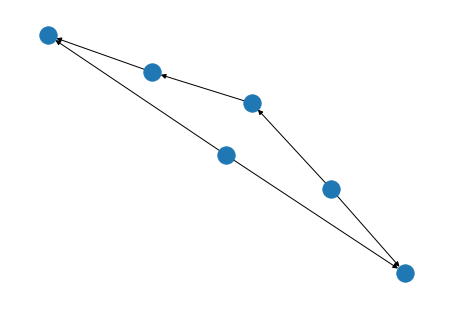

In [13]:
import networkx as nx
%matplotlib inline

g = nx.DiGraph() 
g.add_edge(5, 2); 
g.add_edge(5, 0); 
g.add_edge(4, 0); 
g.add_edge(4, 1); 
g.add_edge(2, 3); 
g.add_edge(3, 1); 

nx.draw(g)

In [19]:
def recursive_dfs(graph, node):
    result = []
    seen = set()

    def recursive_helper(node):
        for neighbor in graph[node]:
            if neighbor not in seen:
                result.append(neighbor)     # this line will be replaced below
                seen.add(neighbor)
                recursive_helper(neighbor)

    recursive_helper(node)
    return result

In [22]:
def recursive_topological_sort(graph, node):
    result = []
    seen = set()

    def recursive_helper(node):
        for neighbor in graph[node]:
            if neighbor not in seen:
                seen.add(neighbor)
                recursive_helper(neighbor)
        result.insert(0, node)              # this line replaces the result.append line

    recursive_helper(node)
    return result

result = recursive_topological_sort(g,5)
result

[5, 0, 2, 3, 1]

In [45]:
def dfs(G,start):
    
    result = [start]
    visited = set([])
    
    def helper(G,start):
        for n in set(G[start]) - visited:
            visited.add(n)
            result.append(n)
            helper(G,n)
            
    helper(G,5)
    return result


def topological_sort(G,start):
    
    result = []
    visited = set([])
    
    def helper(G,start):
        for n in set(G[start]) - visited:
            visited.add(n)
            helper(G,n)
        result.insert(0,start)
        
    helper(G,5)
    return result
                            

G = nx.DiGraph() 
G.add_edge(5, 2); 
G.add_edge(5, 0); 
G.add_edge(4, 0); 
G.add_edge(4, 1); 
G.add_edge(2, 3); 
G.add_edge(3, 1);

dfs(G,5)

[5, 0, 2, 3, 1]

In [60]:
def topological_sort(G):
    
    #visited list
    visited = set()
    stack = []
    
    def helper(G,node):
        for n in set(G[node]) - visited:
            visited.add(n)
            helper(G,n)
        stack.insert(0,node)
        
    for node in G.nodes():
        if node not in visited:
            helper(G,node)
    
    return stack

G = nx.DiGraph() 
G.add_edge(5, 2); 
G.add_edge(5, 0); 
G.add_edge(4, 0); 
G.add_edge(4, 1); 
G.add_edge(2, 3); 
G.add_edge(3, 1);
topological_sort(G)

[4, 5, 2, 3, 1, 0]

## Misc

In [1]:
def primeFactors(n):
    
    factors = []
    
    #divide by 2
    while n % 2 == 0:
        factors.append(2)
        n /= 2
    
    #n is now odd. So find smallest odd
    for i in range(3,int(n)+1,2):
        
        while n % i == 0:
            factors.append(i)
            n /= i
            
    return factors
            
factors = primeFactors(29)
factors

[29]